In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor



# Benjamin Granat
# USCID: 3531735770
# github = https://github.com/bengranat

# 1A

#Reading and concatinating data from Folds5x2_pp.csv file.

file_path = 'Folds5x2_pp.csv'
data = pd.read_csv(file_path)

In [69]:
# 1B(i)

num_of_rows = len(data.index)
num_of_columns = len(data.columns)
print(data.head())
print("There are " + str(num_of_rows) + " rows and " + str(num_of_columns) + " columns.")
print("Each row represents hourly data of ambient variables - Temperature (AT), Ambient Pressure (AP), Relative Humiditiy (RH), and Exhaust Vacuum (V) - collected over 6 years at the Combined Cycle Power Plant. The columns represent each ambient variable's individual hourly datapoints over the course of 6 years.")

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
There are 9568 rows and 5 columns.
Each row represents hourly data of ambient variables - Temperature (AT), Ambient Pressure (AP), Relative Humiditiy (RH), and Exhaust Vacuum (V) - collected over 6 years at the Combined Cycle Power Plant. The columns represent each ambient variable's individual hourly datapoints over the course of 6 years.


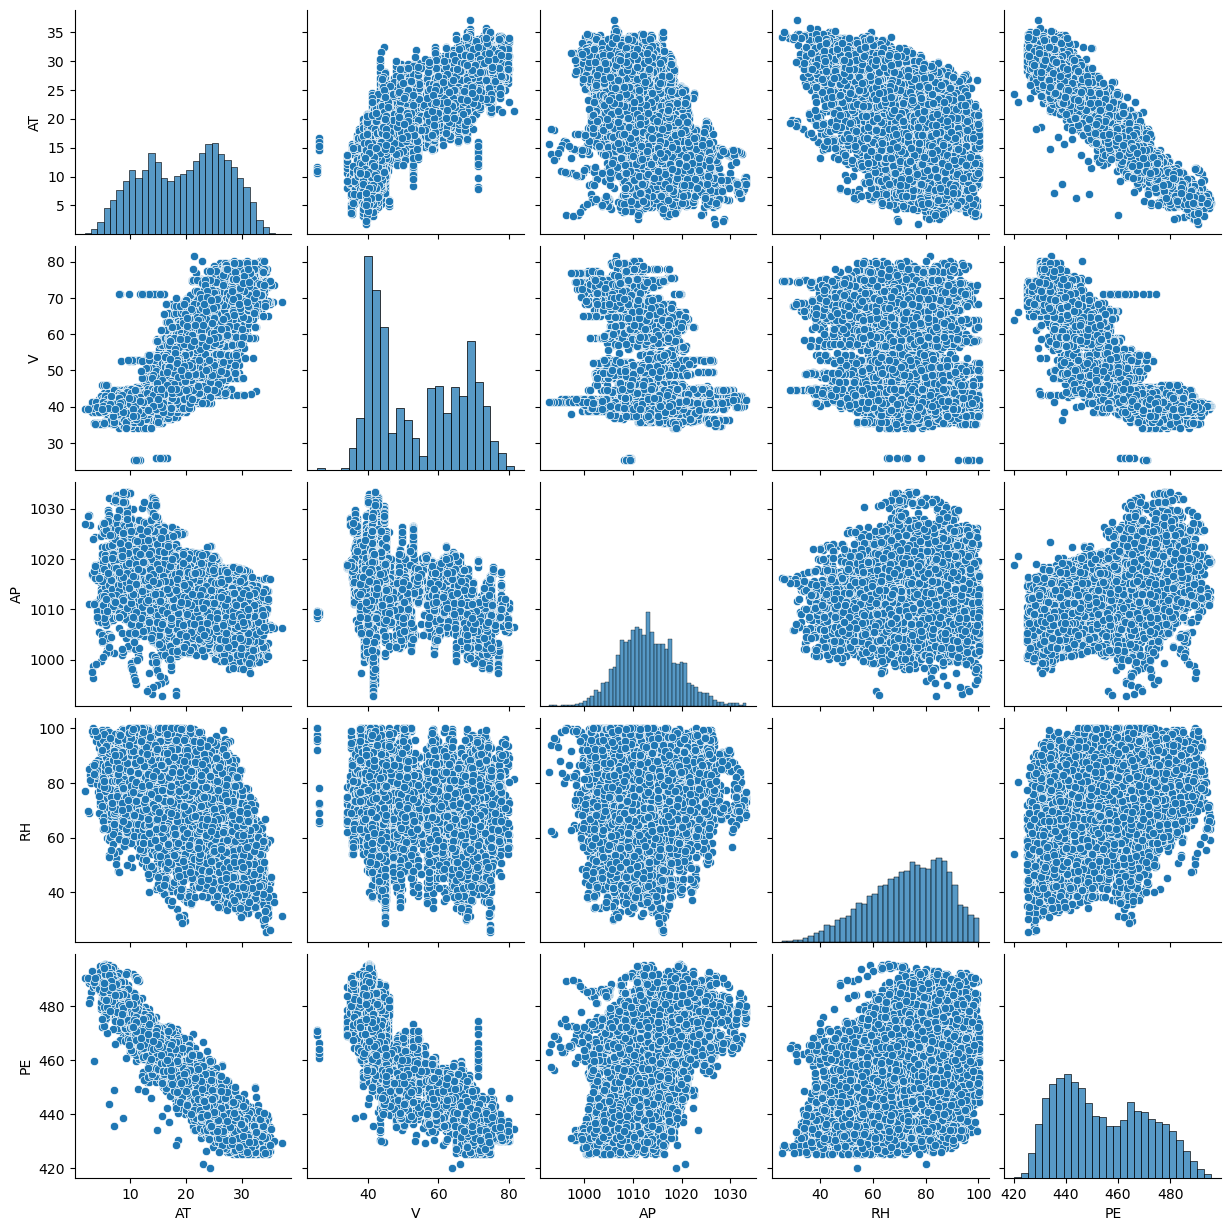

In [70]:
# 1B(ii)

sea.pairplot(data)
plt.show()

In [71]:
# 1B(iii)

mean = data.mean()
median = data.median()
rnge = data.max() - data.min()
first_qrtl = data.quantile(0.25)
third_qrtl = data.quantile(0.75)
inter_qrtl = third_qrtl - first_qrtl

summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Range': rnge,
    'First Quartile': first_qrtl,
    'Third Quartile': third_qrtl,
    'Interquartile Range': inter_qrtl
})

print(summary_stats)

           Mean    Median  Range  First Quartile  Third Quartile  \
AT    19.651231    20.345  35.30         13.5100           25.72   
V     54.305804    52.080  56.20         41.7400           66.54   
AP  1013.259078  1012.940  40.41       1009.1000         1017.26   
RH    73.308978    74.975  74.60         63.3275           84.83   
PE   454.365009   451.550  75.50        439.7500          468.43   

    Interquartile Range  
AT              12.2100  
V               24.8000  
AP               8.1600  
RH              21.5025  
PE              28.6800  


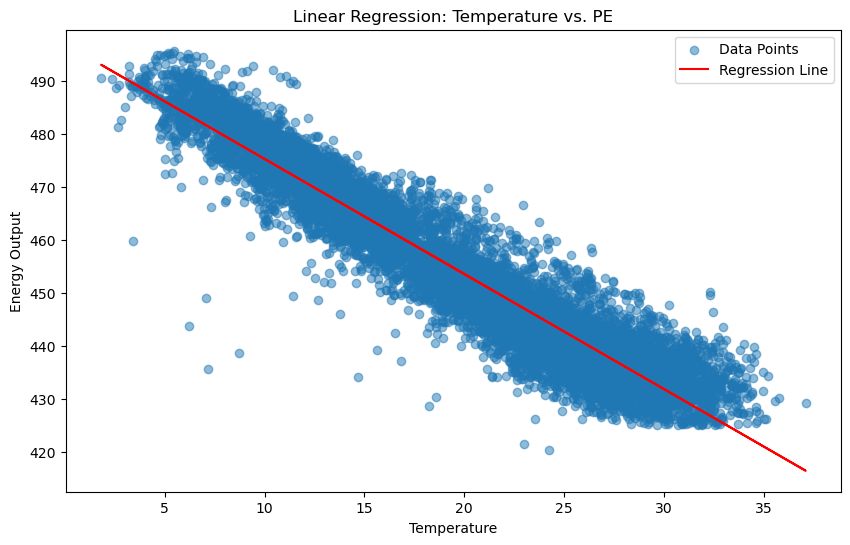

Summary statistics of model: 

Coefficient = -2.1720950031580832

Intercept = 497.0442810361399

R Squared = 0.8981819280128088
P-value = 0.0





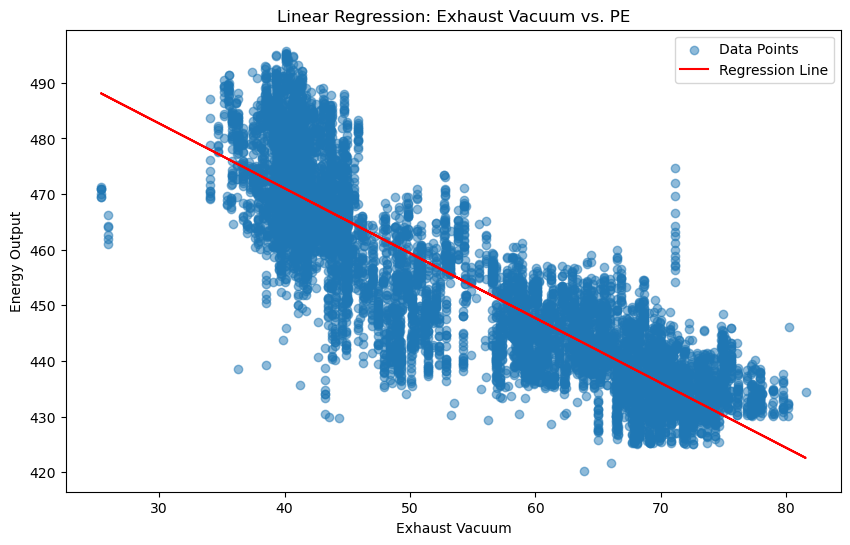

Summary statistics of model: 

Coefficient = -1.1658104640036329

Intercept = 517.650981529308

R Squared = 0.7553862858928462
P-value = 0.0





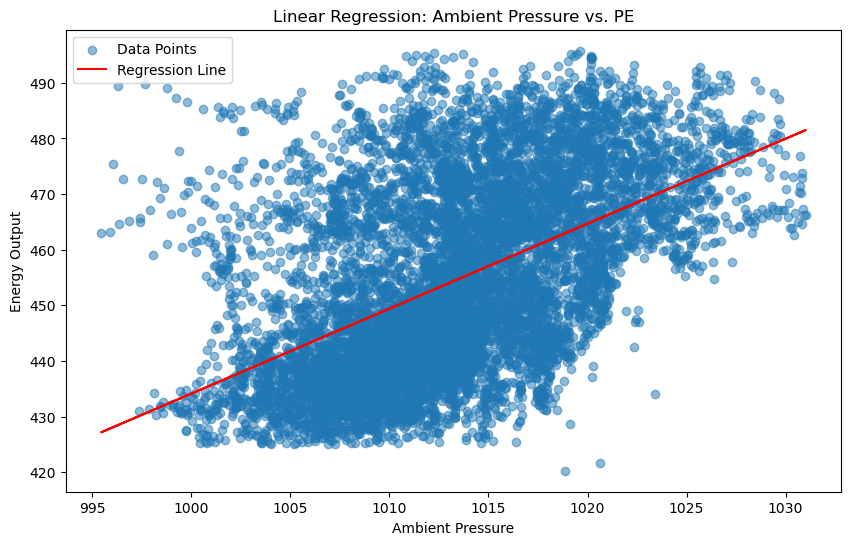

Summary statistics of model: 

Coefficient = 1.5279009610621437

Intercept = -1093.7875476699141

R Squared = 0.2698321545545974
P-value = 0.0





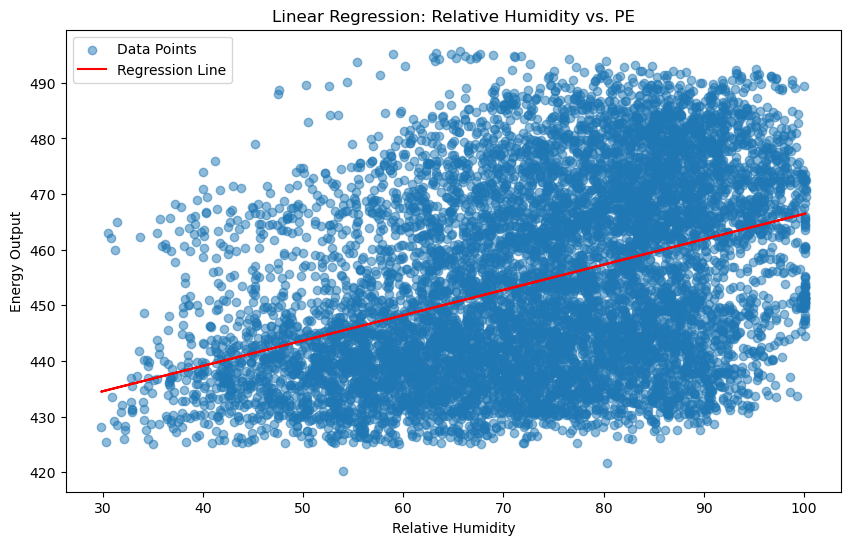

Summary statistics of model: 

Coefficient = 0.455431417074494

Intercept = 420.8753158993488

R Squared = 0.15180792477731642
P-value = 0.0



Temperature (AT) vs. Energy Output (PE) and Exhaust Vacuum (V) vs. Energy Output (PE) have relatively high R-squared values - 
0.89817 and 0.7554 respectively. This indicates a strong linear relationship in both cases and suggests a statistically significant 
association between the predictor and response.





In [121]:
# 1C

nomenclature = pd.Series({
    'AT': "Temperature",
    'V': "Exhaust Vacuum",
    'AP': "Ambient Pressure",
    'RH': "Relative Humidity",
    'PE': "Energy Output",
})

#Citations: Used ChatGPT for outlier identification and regression model structure

#Outliers
outliers = set()
indep_vars = data.drop(columns=['PE'])
for var in indep_vars.columns:
    X = data[[var]].values
    z_scores = (X - np.mean(X)) / np.std(X)
    outliers.update(np.where(np.abs(z_scores) > 3)[0])
data_no_outliers = data.drop(index=list(outliers))

indep_vars = data_no_outliers.drop(columns=['PE'])
dep_var = data_no_outliers['PE']
univar_coeffs = []

for var in indep_vars_no_outliers.columns:
    #Linear regression model
    X = data_no_outliers[[var]].values
    Y = dep_var.values
    model = LinearRegression()
    model.fit(X, Y)
    univar_coeffs.append(model.coef_[0])
    Y_pred = model.predict(X)
    #Summary statistics
    s_s_res = np.sum((Y - Y_pred) ** 2)
    r_sqr = model.score(X, Y)
    n = len(Y)
    se = np.sqrt(s_s_res / (n - 2))
    X_w_intercept = np.hstack([np.ones((n, 1)), X])
    se_b = np.sqrt(np.diagonal(se**2 * np.linalg.inv(X_w_intercept.T @ X_w_intercept)))
    #P-value
    t_stat = model.coef_[0] / se_b[1]
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n - 2))
    #Plotting regression line
    #Citations: Utilized ChatGPT for matplotlib code structure
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, alpha=0.5, label='Data Points')
    plt.plot(X, Y_pred, color='red', label='Regression Line')
    plt.xlabel(nomenclature[var])
    plt.ylabel(nomenclature['PE'])
    plt.title("Linear Regression: " + str(nomenclature[var]) + " vs. PE")
    plt.legend()
    plt.show()
    #Printing summary statistics
    print("Summary statistics of model: ")
    print("\nCoefficient = " + str(model.coef_[0]))
    print("\nIntercept = " + str(model.intercept_))
    print("\nR Squared = " + str(r_sqr))
    print("P-value = " + str(p_value))
    print("\n" + "\n")

print("Temperature (AT) vs. Energy Output (PE) and Exhaust Vacuum (V) vs. Energy Output (PE) have relatively high R-squared values - \n" +
      "0.89817 and 0.7554 respectively. This indicates a strong linear relationship in both cases and suggests a statistically significant \n" +
      "association between the predictor and response.\n")
print("\n")

In [126]:
# 1D

#Citations: Used ChatGPT for regression model structure

#Multiple Regression Model
X = indep_vars_no_outliers[['AT', 'V', 'AP', 'RH']]
Y = dep_var_no_outliers.values
model = LinearRegression()
model.fit(X, Y)
multivar_coeffs = model.coef_
Y_pred = model.predict(X)
#Summary statistics
r_sqr = model.score(X, Y)
n = X.shape[0]
p = X.shape[1]
adj_r_sqr = 1 - ((1 - r_sqr) * (n - 1) / (n - p - 1))
ss_res = np.sum((Y - Y_pred) ** 2)
X_w_intercept = np.hstack([np.ones((n, 1)), X])
se = np.sqrt(ss_res / (n - p - 1))
cov_matrix = np.linalg.inv(X_w_intercept.T @ X_w_intercept)
se_b = np.sqrt(np.diagonal(se**2 * cov_matrix))
#P-values
t_stats = model.coef_ / se_b[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

#Printing summary statistics
print("Regression results:")
print("R-squared: " + str(r_sqr))
print("Adjusted R-squared: " + str(adj_r_sqr))

#Printing coefficients and P-values
columns = indep_vars_no_outliers[['AT', 'V', 'AP', 'RH']].columns
for i, col in enumerate(columns):
    print(col + ": Coefficient: " + str(model.coef_[i]) + ", P-Value: " + str(p_values[i]))

#Identifying predictors that reject null hypothesis
signif_vars = [col for i, col in enumerate(columns) if p_values[i] < 0.05]
print("\nVariables for which we can reject the null hypothesis H0: βj = 0: ")
print(signif_vars)

Regression results:
R-squared: 0.9282081527059994
Adjusted R-squared: 0.928177940460952
AT: Coefficient: -1.9770771073033244, P-Value: 0.0
V: Coefficient: -0.23368727539109554, P-Value: 0.0
AP: Coefficient: 0.06831174029341536, P-Value: 2.2242208075340386e-12
RH: Coefficient: -0.1584435812248584, P-Value: 0.0

Variables for which we can reject the null hypothesis H0: βj = 0: 
['AT', 'V', 'AP', 'RH']


  Predictor  Univariate Coefficients  Multivariate Coefficients
0        AT                -2.172095                  -1.977077
1         V                -1.165810                  -0.233687
2        AP                 1.527901                   0.068312
3        RH                 0.455431                  -0.158444


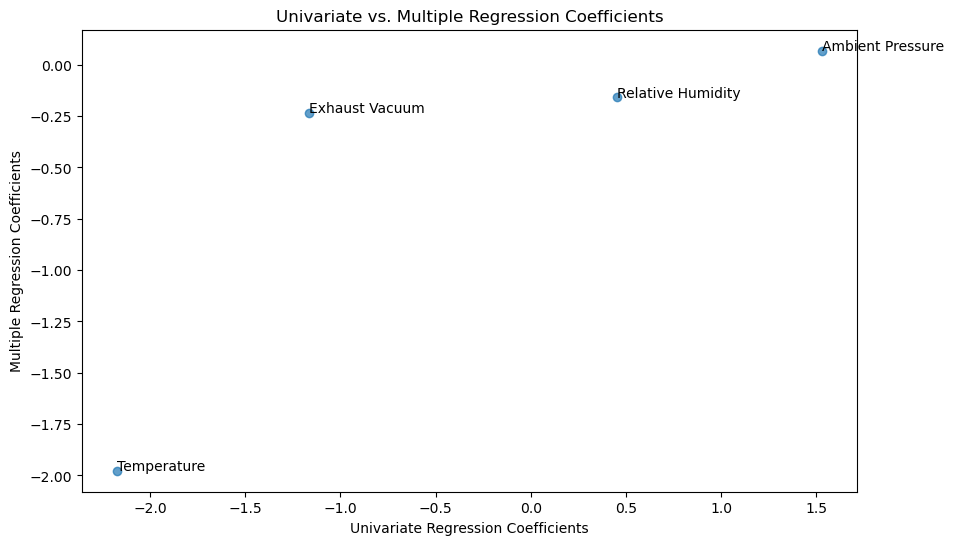

In [127]:
# 1E

#Citations: Utilized ChatGPT for assistance with plotting code structure
plt.figure(figsize=(10, 6))
plt.scatter(univar_coeffs, multivar_coeffs, alpha=0.7)
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Univariate vs. Multiple Regression Coefficients")
for i, col in enumerate(indep_vars.columns):
    plt.annotate(nomenclature[col], (univar_coeffs[i], multivar_coeffs[i]))
regr_results = pd.DataFrame({
    'Predictor': indep_vars.columns,
    'Univariate Coefficients': univar_coeffs,
    'Multivariate Coefficients': multivar_coeffs
})
print(regr_results)
plt.show()

In [130]:
# 1F
#Citations: Utilized ChatGPT for polynomial regression code structure and plotting statement structure

for var in indep_vars_no_outliers.columns:
    #Polynomial regression model of degree 3
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly.fit_transform(data_no_outliers[[var]])
    model = LinearRegression()
    model.fit(X_poly, dep_var_no_outliers)
    Y_pred = model.predict(X_poly)
    #Summary statistics
    r_sqr = model.score(X_poly, dep_var_no_outliers)
    s_s_res = np.sum((dep_var_no_outliers - Y_pred) ** 2)
    s_s_total = np.sum((dep_var_no_outliers - np.mean(dep_var_no_outliers)) ** 2)
    n = len(dep_var_no_outliers)
    p = X_poly.shape[1]
    se = np.sqrt(s_s_res / (n - p))
    X_w_intercept = np.hstack([np.ones((n, 1)), X_poly])
    cov_matrix = np.linalg.inv(X_w_intercept.T @ X_w_intercept)
    se_b = np.sqrt(np.diagonal(cov_matrix)) * se
    #P-values
    t_stats = model.coef_ / se_b[1:]
    p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p)) for t in t_stats]
    
    #Printing summary statistics and p-values
    print("Summary statistics of model: ")
    print("Coefficient = " + str(model.coef_))
    print("Intercept = " + str(model.intercept_))
    print("R Squared = " + str(r_sqr))
    print("P-values = " + str(p_values))
    if any(p < 0.05 for p in p_values):
        print("There is evidence of nonlinear association for " + str(nomenclature[var]) + " (" + str(var) + ")\n\n")
    else:
        print("No evidence of nonlinear association for " + str(nomenclature[var]) + " (" + str(var) + ")\n\n")

Summary statistics of model: 
Coefficient = [-0.60168317 -0.12608965  0.00269744]
Intercept = 492.73989876854665
R Squared = 0.9112941098810622
P-values = [1.332412867371957e-06, 0.0, 0.0]
There is evidence of nonlinear association for Temperature (AT)


Summary statistics of model: 
Coefficient = [-2.14272214e+00 -2.68819578e-03  1.34135262e-04]
Intercept = 554.005936692481
R Squared = 0.7739916524532053
P-values = [2.6182933526630592e-05, 0.7707683759857569, 0.014016897838692088]
There is evidence of nonlinear association for Exhaust Vacuum (V)


Summary statistics of model: 
Coefficient = [-1.75740351e+04  1.73029653e+01 -5.67800418e-03]
Intercept = 5949521.122679194
R Squared = 0.29388448555986746
P-values = [0.0, 0.0, 0.0]
There is evidence of nonlinear association for Ambient Pressure (AP)


Summary statistics of model: 
Coefficient = [-1.84718625e+00  3.35041496e-02 -1.57058934e-04]
Intercept = 471.5144226996076
R Squared = 0.1536479603620169
P-values = [0.0003241875400861183, 1

In [132]:
# 1G

#Citations: Utilized ChatGPT for pairwise interaction regression code structure and error debugging

#Pairwise interaction term storage
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(indep_vars_no_outliers)
#Regression model using interaction terms
model = LinearRegression()
model.fit(X_interactions, dep_var_no_outliers)
Y_pred = model.predict(X_interactions)
#Summary statistics
r_sqr = model.score(X_interactions, dep_var_no_outliers)
s_s_res = np.sum((dep_var_no_outliers - Y_pred) ** 2)
s_s_total = np.sum((dep_var_no_outliers - np.mean(dep_var_no_outliers)) ** 2)
n = len(dep_var_no_outliers)
p = X_interactions.shape[1]
se = np.sqrt(s_s_res / (n - p))
X_w_intercept = np.hstack([np.ones((n, 1)), X_interactions])
cov_matrix = np.linalg.inv(X_w_intercept.T @ X_w_intercept)
se_b = np.sqrt(np.diagonal(cov_matrix)) * se
#P-Values
t_stats = model.coef_ / se_b[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p)) for t in t_stats]

#Printing summary statistics
print("Summary statistics of the full model with interaction terms:")
print("R Squared = " + str(r_sqr))
#Printing coefficients and individual p-values
print("Coefficients = " + str(model.coef_))
print("P-values = " + str(p_values))

#Checking for significant interaction terms
interaction_terms = poly.get_feature_names_out(indep_vars_no_outliers.columns)
significant_interactions = [(interaction_terms[i], p_values[i]) for i in range(len(p_values)) if p_values[i] < 0.05]
non_significant_interactions = [(interaction_terms[i], p_values[i]) for i in range(len(p_values)) if p_values[i] >= 0.05]

#Printing structure for significant and insignificant interactions
if significant_interactions:
    print("\nSignificant interaction terms found:")
    for term, p_value in significant_interactions:
        print("Term: " + str(term) + ", P-value: " + str(p_value))
else:
    print("No significant interaction terms found.")
    
if non_significant_interactions:
    print("\nNon-significant interaction terms found:")
    for term, p_value in non_significant_interactions:
        print("Term: " + str(term) + ", P-value: " + str(p_value))

Summary statistics of the full model with interaction terms:
R Squared = 0.9359791197984215
Coefficients = [-2.67985333e+00 -8.13093106e+00 -9.19169089e-02  2.23417436e+00
  2.10137040e-02  1.31293861e-04 -5.49257909e-03  7.26426351e-03
  8.07702575e-04 -2.26016889e-03]
P-values = [0.277536454578728, 3.1803351063786067e-09, 0.24685285190685202, 0.005359903032464253, 0.0, 0.9569513323488779, 1.865929633027008e-11, 7.196427143085771e-08, 0.09933916973135837, 0.004073945724371031]

Significant interaction terms found:
Term: V, P-value: 3.1803351063786067e-09
Term: RH, P-value: 0.005359903032464253
Term: AT V, P-value: 0.0
Term: AT RH, P-value: 1.865929633027008e-11
Term: V AP, P-value: 7.196427143085771e-08
Term: AP RH, P-value: 0.004073945724371031

Non-significant interaction terms found:
Term: AT, P-value: 0.277536454578728
Term: AP, P-value: 0.24685285190685202
Term: AT AP, P-value: 0.9569513323488779
Term: V RH, P-value: 0.09933916973135837


In [142]:
# 1H

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Multivariate regression model split into train and test sets
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)
#Calculation of train and test MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

#Regression model involing all possible interaction terms and quadratic nonlinearities
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model_full = LinearRegression()
model_full.fit(X_poly_train, y_train)

#Summary statistics
s_s_res = np.sum((y_train - model_full.predict(X_poly_train)) ** 2)
n = len(y_train)
p = X_poly_train.shape[1]
se = np.sqrt(s_s_res / (n - p))
X_w_intercept = np.hstack([np.ones((n, 1)), X_poly_train])
cov_matrix = np.linalg.inv(X_w_intercept.T @ X_w_intercept)
#P-Values
se_b = np.sqrt(np.diagonal(cov_matrix)) * se
t_stats = model_full.coef_ / se_b[1:]
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p)) for t in t_stats]

#Select significant variables (p-value < 0.05)
#Citations: Utilized ChatGPT for selecting structure
significant_indices = [i for i, p in enumerate(p_values) if p < 0.05]
X_poly_train_sig = X_poly_train[:, significant_indices]
X_poly_test_sig = X_poly_test[:, significant_indices]

#Extraction of feature names and printing of significant/insignificant terms and their p-values
#Citations: Utilized ChatGPT to help extract significant feature names and utilize np function as well as the printing statement
feature_names = poly.get_feature_names_out(input_features=X.columns)
significant_terms = [feature_names[i] for i in significant_indices]
insignificant_indices = np.setdiff1d(range(len(feature_names)), significant_indices)
insignificant_terms = [feature_names[i] for i in insignificant_indices]
print("Significant terms in the full model:")
for i in significant_indices:
    print("Term: " + str(feature_names[i]) + ", P-value: " + str(p_values[i]))
print("\nInsignificant terms in the full model:")
for i in insignificant_indices:
    print("Term: " + str(feature_names[i]) + ", P-value: " + str(p_values[i]))

#Regression model with insignificant terms removed
model_final = LinearRegression()
model_final.fit(X_poly_train_sig, y_train)
y_train_pred_fin = model_final.predict(X_poly_train_sig)
y_test_pred_fin = model_final.predict(X_poly_test_sig)
train_mse_fin = mean_squared_error(y_train, y_train_pred_fin)
test_mse_fin = mean_squared_error(y_test, y_test_pred_fin)

#Printing of MSE results
print("\nMultivariate Regression:")
print("Train MSE: " + str(train_mse_fin))
print("Test MSE: " + str(test_mse_fin))
print("\nReduced Polynomial Regression:")
print("Train MSE: " + str(train_mse_reg))
print("Test MSE: " + str(test_mse_reg))


Significant terms in the full model:
Term: AP, P-value: 1.0949827178308169e-07
Term: RH, P-value: 0.0004101862018606184
Term: AT^2, P-value: 1.959567741405266e-07
Term: AT V, P-value: 0.004109544347975946
Term: AT RH, P-value: 0.00267009622509895
Term: AP^2, P-value: 1.01394002305355e-07
Term: AP RH, P-value: 0.0007766170332632605
Term: RH^2, P-value: 1.56583146448952e-09

Insignificant terms in the full model:
Term: AT, P-value: 0.07368309126941863
Term: V, P-value: 0.1553587042666269
Term: AT AP, P-value: 0.27358465916458363
Term: V^2, P-value: 0.7014746777598253
Term: V AP, P-value: 0.23782178722421365
Term: V RH, P-value: 0.7861595990953765

Multivariate Regression:
Train MSE: 20.192472544807
Test MSE: 20.3180613943432

Reduced Polynomial Regression:
Train MSE: 20.775266030485135
Test MSE: 20.989147569179075


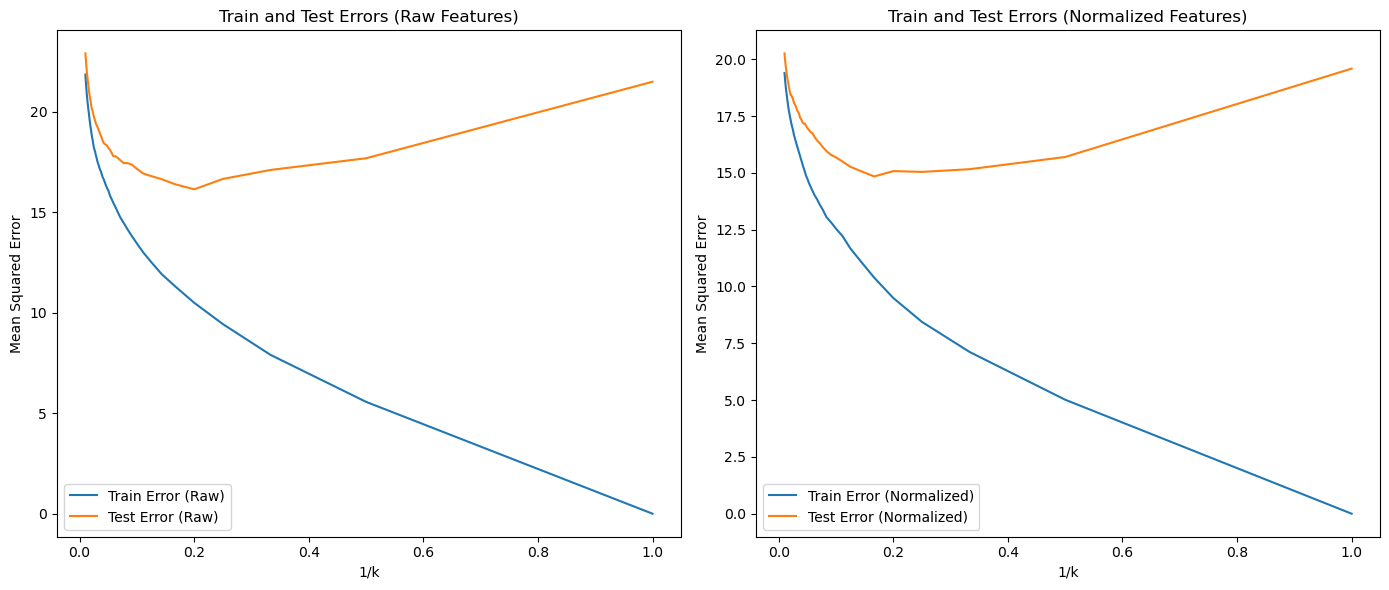

Best k for raw feature model: 5 -> Raw feature model test MSE: 16.13515847879425
Best k for normalized feature model: 6 -> Normalized feature model test MSE: 14.841516243135876


In [153]:
# 1H

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Lists to store test errors 
train_errors_raw = []
test_errors_raw = []
train_errors_norm = []
test_errors_norm = []

#Normalizing features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#KNN Regression models for k ∈ {1,2, . . . ,100}
k_values = range(1, 101)
for k in k_values:
    
    #KNN (Raw Features) Model
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))
    
    #KNN (Normalized Features) Model
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_norm.fit(X_train_norm, y_train)
    y_train_pred_norm = knn_norm.predict(X_train_norm)
    y_test_pred_norm = knn_norm.predict(X_test_norm)
    train_errors_norm.append(mean_squared_error(y_train, y_train_pred_norm))
    test_errors_norm.append(mean_squared_error(y_test, y_test_pred_norm))

#Plotting train and test errors for both raw and normalized models in terms of 1/k
plt.figure(figsize=(14, 6))

#Raw feature model
plt.subplot(1, 2, 1)
plt.plot(1/np.array(k_values), train_errors_raw, label='Train Error (Raw)')
plt.plot(1/np.array(k_values), test_errors_raw, label='Test Error (Raw)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors (Raw Features)')
plt.legend()

#Normalized feature model
plt.subplot(1, 2, 2)
plt.plot(1/np.array(k_values), train_errors_norm, label='Train Error (Normalized)')
plt.plot(1/np.array(k_values), test_errors_norm, label='Test Error (Normalized)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors (Normalized Features)')
plt.legend()
plt.tight_layout()
plt.show()

#Best K Values
best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_norm = k_values[np.argmin(test_errors_norm)]
print('Best k for raw feature model: ' + str(best_k_raw) + ' -> Raw feature model test MSE: ' + str(min(test_errors_raw)))
print('Best k for normalized feature model: ' + str(best_k_norm) + ' -> Normalized feature model test MSE: ' + str(min(test_errors_norm)))

In [154]:
# 1J

print("\nKNN Regression with normalized features has the smallest test error.\n")
print("KNN Regression likely has a smaller test MSE than the polynomial regression due to the concept of overfitting. With added complexity "
      "\nin higher order polynomial interactions, the test MSE may grow larger. With optimal k however, the KNN regression can avoid overfitting"
      "\nand minimize test MSE.")


KNN Regression with normalized features has the smallest test error.

KNN Regression likely has a smaller test MSE than the polynomial regression due to the concept of overfitting. With added complexity 
in higher order polynomial interactions, the test MSE may grow larger. With optimal k however, the KNN regression can avoid overfitting
and minimize test MSE.


In [152]:
# 2A

print("Q: The sample size n is extremely large, and the number of predictors p is small. Flexible or inflexible statistical learning method?")
print("A: Flexible statistical learning method would be better - more useful when dealing with patterns and hidden associations of large sample sizes \nwhile minimizing the risk of overfitting.\n")
      
# 2B

print("Q: The number of predictors p is extremely large, and the number of observations n is small. Flexible or inflexible statistical learning method?")
print("A: Inflexible statistical learning method would perform better. Since there is a limited number of observations, it would be hard to draw conclusions regarding\n"
     "regarding the variability of the data, causing potential issues of overfitting when using the flexible learning method.\n")

# 2C

print("Q: The relationship between the predictors and response is highly non-linear. Flexible or inflexible statistical learning method?")
print("A: Flexible statistical learning method would be better - fitting data that has non-linear relationships would be better using a flexible method.\n")

# 2D

print("Q: The variance of the error terms, i.e. σ^2 = Var(ϵ), is extremely high. Flexible or inflexible statistical learning method?")
print("A: Inflexible statistical learning method would perform better. Because the flexible incorporates the error terms' noise, the model fitting will end up worse - the variance increases\n")

Q: The sample size n is extremely large, and the number of predictors p is small. Flexible or inflexible statistical learning method?
A: Flexible statistical learning method would be better - more useful when dealing with patterns and hidden associations of large sample sizes 
while minimizing the risk of overfitting.

Q: The number of predictors p is extremely large, and the number of observations n is small. Flexible or inflexible statistical learning method?
A: Inflexible statistical learning method would perform better. Since there is a limited number of observations, it would be hard to draw conclusions regarding
regarding the variability of the data, causing potential issues of overfitting when using the flexible learning method.

Q: The relationship between the predictors and response is highly non-linear. Flexible or inflexible statistical learning method?
A: Flexible statistical learning method would be better - fitting data that has non-linear relationships would be better us

In [150]:
# 3A

#Citations: Utilized ChatGPT for efficient dataframe storage structure. 
data = {
    'X_1': [0, 2, 0, 0, -1, 1],
    'X_2': [3, 0, 1, 1, 0, 1],
    'X_3': [0, 0, 3, 2, 1, 1],
    'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
}
df = pd.DataFrame(data)
test_point = np.array([0, 0, 0])
df['Euclidean Distance'] = np.sqrt((df['X_1'] - test_point[0])**2 + (df['X_2'] - test_point[1])**2 + (df['X_3'] - test_point[2])**2)
print(df)

# 3B

print("\nWhen K=1, we would predict a Green label - the nearest neighbor is in line 4 of the dataframe (Euclidean distance of 1.414214), which has a Green label.")

# 3C

print("\nWhen K=3, we would predict a Red label - the 3 nearest neighbors are in lines 4, 5, and 1 of the dataframe (Euclidean distance of 1.414214, 1.732051, and 2 respectivelly)." 
      "\nThese lines have Green, Red, and Red as their labels. By majority decision, we would predict Red.")

# 3D

print("\nWe would expect the best value for K to be small. Since the boundary becomes more and more linear as K gets large,"
      "\nwe would see a small K to invoke highly non-linear decision boundaries.")

   X_1  X_2  X_3      Y  Euclidean Distance
0    0    3    0    Red            3.000000
1    2    0    0    Red            2.000000
2    0    1    3    Red            3.162278
3    0    1    2  Green            2.236068
4   -1    0    1  Green            1.414214
5    1    1    1    Red            1.732051

When K=1, we would predict a Green label - the nearest neighbor is in line 4 of the dataframe (Euclidean distance of 1.414214), which has a Green label.

When K=3, we would predict a Red label - the 3 nearest neighbors are in lines 4, 5, and 1 of the dataframe (Euclidean distance of 1.414214, 1.732051, and 2 respectivelly).
These lines have Green, Red, and Red as their labels. By majority decision, we would predict Red.

We would expect the best value for K to be small. Since the boundary becomes more and more linear as K gets large,
we would see a small K to invoke highly non-linear decision boundaries.
